# Abstract

What drives U.S. Equity Returns? Are there any characteristics that explain the differences in stock returns? If there are any robust and independent factors, then can they illustrate the nature of equity prices?

This Data Science Project in the domain of supervised learning for known and expected outcome uses multiple linear regression with data visualizations. The implementation of the Fama – French Three –Factor Model with the data source of Kenneth French’s website produces powerful test results. Goodness of fit measures are close to perfection with a range from 0.95 to 0.99 for the performance of six portfolios from July 1926 to June 2018 on a monthly frequency against the three independent drivers of stock returns.

(TO DO:  REREAD and REVISE as needed)


# Introduction

People in the financial markets have long been interested on the background of stock prices.  Colloquial and academic theories rise and fall like stock prices over decades of observations.  Testable explanations in the science of statistics would shed light on the viable understanding on how stock markets work.  Many scholars and practitioners have selected and examined various factors and features with various test results on the nature of stock market returns, but there is only one that dominates above the rest.    

In 2013, Eugene Fama of the University of Chicago, received the Nobel Memorial Prize in Economic Sciences for his life’s work on financial economics.  Together with Kenneth French, who was also at the University of Chicago at the time, wrote a seminal research paper on stock market returns in 1993.   Their strong scientific significance is the Fama – French Three – Factor Model coupled with an outstanding data set, which used a multiple linear regression model to explain the nature of stock market returns.  Beyond awards, the research paper is one of the most cited research papers in all of academia, i.e. the top 5% of the thousands according to the reputable Social Science Research Network.  Both Fama and French have facilitated the fecundity of factor based investing in the field of financial econometrics.  Many academics and professionals in the financial services industry have used the foundation of the Fama – French Three – Factor Model to understand the rates of return in the stock market and expanded or have even altered the factors to other products in the financial markets.

# Footnote to REVISE later

Citation

Social Science Research Network: https://www.ssrn.com

Fama, Eugene; French, Kenneth. R. (1993). "Common risk factors in the returns on stocks and bonds". Journal of Financial Economics.


# The Financial Data Landscape

Unlike many other industrial sectors, the financial services industry and its financial data is widely available because there are financial incentives to invest.  The free and commercial publishing of equity market information has been around for decades, if not a century, which eases data selection for data scientists.  If there are any data discrepancies, gaps or limitations, then there are resources for a remedy funded by financial institutions.  The merged data of the Center for Research in Secruity Prices (CRSP) and Compustat that originally began in 1962 at the University of Chicago is the chosen data set for this project. 

# Operational Definitions YET TO ADD

Market Risk:  The chance that something will lose value is risk, which is the cause of returns.

Market:  A working space of products that are fungible with standardized and identical specifications so participants can buy and sell.  Either side of a transaction can identify and quantify with ease.  Furthermore, publically traded companies with transparency and add to the speed of trading . . . (REVISE and EXPAND)   

# Feature Engineering

Now that we have selected the data set let’s select the inputs to explain U.S. stock returns.  All of the segments of the CRSP return database are continuous variables with different attributes.  But wait . . . as described in the introduction, both colloquial and academic theories in the past have made many attempts to understand the backstage of stock prices and returns, especially categorical.  Both formal and informal models have focused on the pockets of time such as in times of war or recently (near) zero interest rates.  A theory in times of war about what drives stock returns unlike in times of peace.  Similar to interest rates levels close to zero and far from zero.  Nonetheless, let's take a look at returns only so we can compare like with like to identify a difference.  Base levels differ before performance calculations, but this will lead us to the theory behind the three factor model.

ELABORATE WITH http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/bench_m_buy.html

# Model Background (REVISION NEEDED)

The three factors are the sensitivities of the market, small over big and value over growth.

(1) The market risk factor is the quantity of exposure an investor may have to the entire U.S. Stock Market over the risk free investment of a T – Bill.

(2) The size risk factor is the return of low capitalized companies over the return of large capitalized companies. Specifically, the average return of the bottom 30% of companies over the average return of the top 30% (INVESTIGATE THIS SENTENCE FOR ACCURACY) Smaller companies have less departments to absorb the impacts of business risks and less financial capacity compared to large companies.

(3) The value risk factor is the low price stock exposure or stocks with high book – to – market ratios that are undervalued. To elaborate, value is a financial metric made of components like book value and market value. What a company has in assets with what it owes in liabilities is the net worth or book value. The value of future earnings of the company are not considered as book value is a snapshot of current assets minus liabilities. Separately, market value is a price adjusted quantity available in the financial market or the price per tradeable share times the number of tradeable shares outstanding. Similar to the price square foot in real estate, market value is the price market participants will buy or sell a product in a market. Supply and demand drives market value like a vote for value. Altogether, the book value is the numerator of the ratio and market value is the denominator. Value stocks have greater book values than market values so high book – to – market ratios.

OPERATION DEFINTION: Value is what something is worth, regardless of the methodology . . . and price is the transaction amount at execution, regardless if there is a methodology or not. Value is a thought and maybe an execution, but price is always an execution and maybe a thought.

# Addendum to Financial Data Landscape

One type of selection bias, survivorship bias, is the proclivity of removing failed companies that can potentially skew results.  Small companies rather than larger sized companies are more likely to fail for a variety of reasons.  The economics of competition, the business of mismanagement, running out of cash financially to name a few, but officially the U.S. Bureau of Labor Statistics in March of 2017 claims 20% of small business fail in the first year and 50% fail in the fifth year.  Moreover, the vast majority of companies are not public because of associated costs and risk of business regulations.  Nonetheless, the CRSP data has the most accurate lifecycle picture of publically traded small companies in the U.S. with new entrants and exiting business failures.  Data capture adds value to data analysis.    

Citation

The U.S. Bureau of Labor Statistics is part of the U.S. Department of Labor of the Federal Government of the United States . . . https://www.bls.gov/bdm/bdmage.htm (Table 7. Survival of private sector establishments by opening year)  

In [2]:
import math
import warnings
from colorama import Fore

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

# Load the file

In [3]:
df = pd.read_csv('/Users/lacivert/3/ff3f.csv')

df = pd.DataFrame(df)

list(df.columns.values)

['Month',
 'Mkt-RF',
 'SMB',
 'HML',
 'SMALL LoBM-RF',
 'ME1 BM2-RF',
 'SMALL HiBM-RF',
 'BIG LoBM-RF',
 'ME2 BM2-RF',
 'BIG HiBM-RF']

# Assign the variables

In [4]:
# Time
month = df.loc[:,'Month']

# independent factors 
market_return, small_vs_big, value_vs_growth = df.loc[:,'Mkt-RF'], df.loc[:,'SMB'], df.loc[:,'HML']

# dependent factors on small companies across style
small_growth_excess_return, small_neutral_excess_return = df.loc[:,'SMALL LoBM-RF'], df.loc[:,'ME1 BM2-RF']

small_value_excess_return = df.loc[:,'SMALL HiBM-RF']   

# dependent factors on large companies across style 
large_growth_excess_return, large_neutral_excess_return = df.loc[:,'BIG LoBM-RF'], df.loc[:,'ME2 BM2-RF']

large_value_excess_return = df.loc[:,'BIG HiBM-RF']

In [5]:
# Sanity check for length
len(month), len(market_return), len(small_vs_big), len(value_vs_growth),len(small_growth_excess_return), len(small_neutral_excess_return), len(small_value_excess_return),len(large_growth_excess_return), len(large_neutral_excess_return), len(large_value_excess_return)

(1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104, 1104)

# Subset of independent variables

In [6]:
three = [market_return, small_vs_big, value_vs_growth]

df_three = pd.DataFrame(data=three)

df_three.reset_index()

df_independent_factors = df_three.transpose()

df_independent_factors.rename (columns={'Mkt-RF' : 'Market_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'SMB' : 'Size_Risk_Factor'}, inplace=True)

df_independent_factors.rename (columns={'HML' : 'Style_Risk_Factor'}, inplace=True)

df_independent_factors.describe()

,Market_Risk_Factor,Size_Risk_Factor,Style_Risk_Factor
count,1104.000,1104.000,1104.000
mean,0.662,0.216,0.373
std,5.332,3.200,3.490
min,-29.130,-17.280,-13.280
25%,-1.970,-1.560,-1.305
50%,1.015,0.080,0.155
75%,3.635,1.745,1.732
max,38.850,36.700,35.460


# Correlation Matrix of Independent Factors

In [7]:
corr = df_independent_factors.corr()

Text(0.5,1,'Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018')

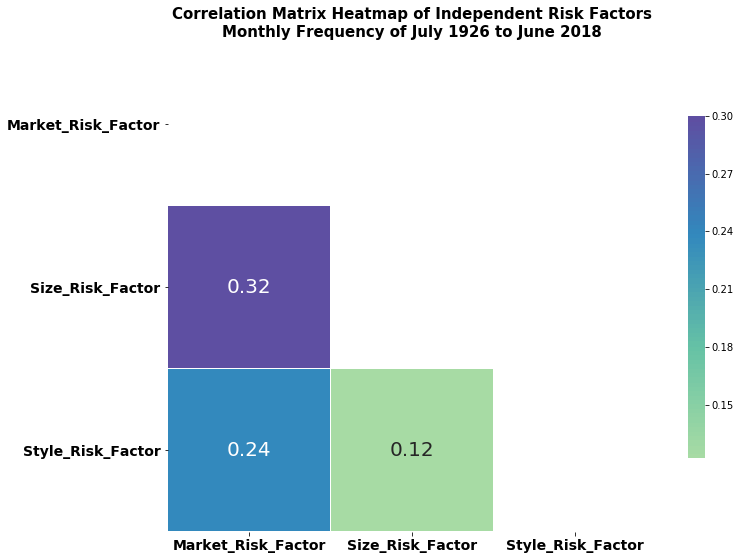

In [9]:
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0, annot_kws={"size": 20}, 
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .7})

plt.yticks(rotation=0, fontweight='bold', fontsize=14)
plt.xticks(fontweight='bold', fontsize=14)
plt.title('Correlation Matrix Heatmap of Independent Risk Factors\nMonthly Frequency of July 1926 to June 2018'
          , fontweight='bold', fontsize=15,color='k')

AttributeError: 'NoneType' object has no attribute 'remove'

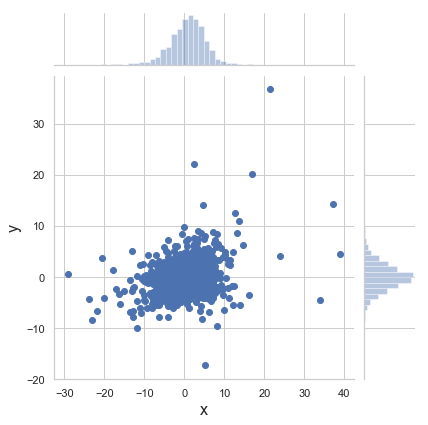

In [10]:
sns.set(style="whitegrid")
w = sns.jointplot(x=market_return,y=small_vs_big)

w.set_axis_labels('x', 'y', fontsize=16)
w.ax_joint.legend_.remove()
w.ax_joint.set_xlabel('Market Risk Factor', fontweight='bold', color='royalblue')
w.ax_joint.set_ylabel('Size Risk Factor', fontweight='bold', color='darkblue')
w.ax_joint.set_title('Jointplot with 0.32 Correlation',fontweight='bold',fontsize=18)

plt.tight_layout()

AttributeError: 'NoneType' object has no attribute 'remove'

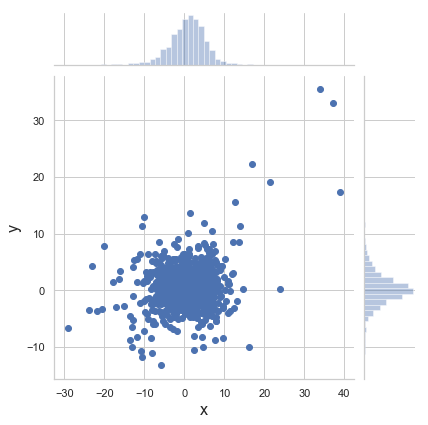

In [11]:
sns.set(style="whitegrid")
w = sns.jointplot(x=market_return,y=value_vs_growth)

w.set_axis_labels('x', 'y', fontsize=16)
w.ax_joint.legend_.remove()
w.ax_joint.set_xlabel('Market Risk Factor', fontweight='bold', color='royalblue')
w.ax_joint.set_ylabel('Style Risk Factor', fontweight='bold', color='steelblue')
w.ax_joint.set_title('Jointplot with 0.24 Correlation',fontweight='bold',fontsize=18)

plt.tight_layout()

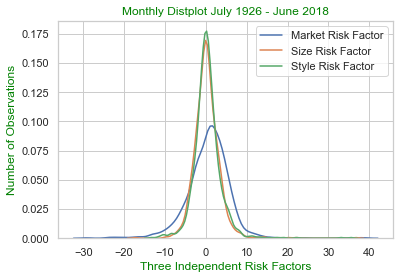

In [12]:
sns.distplot(market_return,label='Market Risk Factor',hist=False)
sns.distplot(small_vs_big,label='Size Risk Factor',hist=False)
sns.distplot(value_vs_growth, label='Style Risk Factor',hist=False)
plt.xlabel('Three Independent Risk Factors',color='green')
plt.ylabel('Number of Observations',color='green')
plt.title('Monthly Distplot July 1926 - June 2018', color='green')
plt.legend()

# Create Training Set

In [13]:
from sklearn.model_selection import cross_val_score

# Unit 2, Lesson 3 Evaluating Classifiers, Section 3 In Sample evaluation

# HELP